In [1]:
import os, pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings("ignore")

import evals.embed_evals as evals
import pickle
import utils
y_train = np.array([0]*80+[1]*80)
y_valid = np.array([0]*20+[1]*20)

In [2]:
dwac_train = pickle.load(open("embeds/bm/dwac_train_emb10.merged10.pkl","rb"))
dwac_valid = pickle.load(open("embeds/bm/dwac_valid_emb10.merged10.pkl","rb"))
resn_train = pickle.load(open("embeds/bm/resn_train_emb10.pkl","rb"))
resn_valid = pickle.load(open("embeds/bm/resn_valid_emb10.pkl","rb"))
TN_train = pickle.load(open("embeds/bm/human/TN_train_emb10.pkl","rb"))
TN_valid = pickle.load(open("embeds/bm/human/TN_valid_emb10.pkl","rb"))
MTL_train = pickle.load(open("embeds/bm/human/MTL.BCETN_train_emb10.pkl","rb"))
MTL_valid = pickle.load(open("embeds/bm/human/MTL.BCETN_valid_emb10.pkl","rb"))

In [3]:
dwac = evals.bm_eval_human(dwac_train, dwac_valid)

{'train_triplet_acc': 0.6608391608391608, 'valid_triplet_acc': 0.6811594202898551, 'knn_acc': 0.85, 'knn_auc': 0.8500000000000001, 'human_1NN_align': 0.005}


In [4]:
resn = evals.bm_eval_human(resn_train, resn_valid)

{'train_triplet_acc': 0.6748251748251748, 'valid_triplet_acc': 0.6956521739130435, 'knn_acc': 1.0, 'knn_auc': 1.0, 'human_1NN_align': 0.025}


In [5]:
TN = evals.bm_eval_human(TN_train, TN_valid)

{'train_triplet_acc': 1.0, 'valid_triplet_acc': 0.8405797101449275, 'knn_acc': 0.85, 'knn_auc': 0.85, 'human_1NN_align': 1.0}


In [6]:
MTL = evals.bm_eval_human(MTL_train, MTL_valid)

{'train_triplet_acc': 1.0, 'valid_triplet_acc': 0.8985507246376812, 'knn_acc': 0.95, 'knn_auc': 0.95, 'human_1NN_align': 0.075}


In [7]:
def vis_clf_human(results, clf, human, xlabel, ylabel, legend, title=None, save=False, save_dir=None):
    subtitles = ["all", "train", "valid"]
    plt.figure(figsize=(8, 6))

    for result in results:
        plt.scatter(result[human],result[clf], s=500)

    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20)
    # plt.xlim(0.6, 1.05)
    # plt.ylim(0.6, 1.05)
    plt.legend(legend)

    if not title: title = f"{xlabel} vs. {ylabel}"
    plt.title(title,fontsize=30)
    if save:
        if not save_dir: save_dir = f"figs/{title}.png"
        plt.savefig(save_dir)

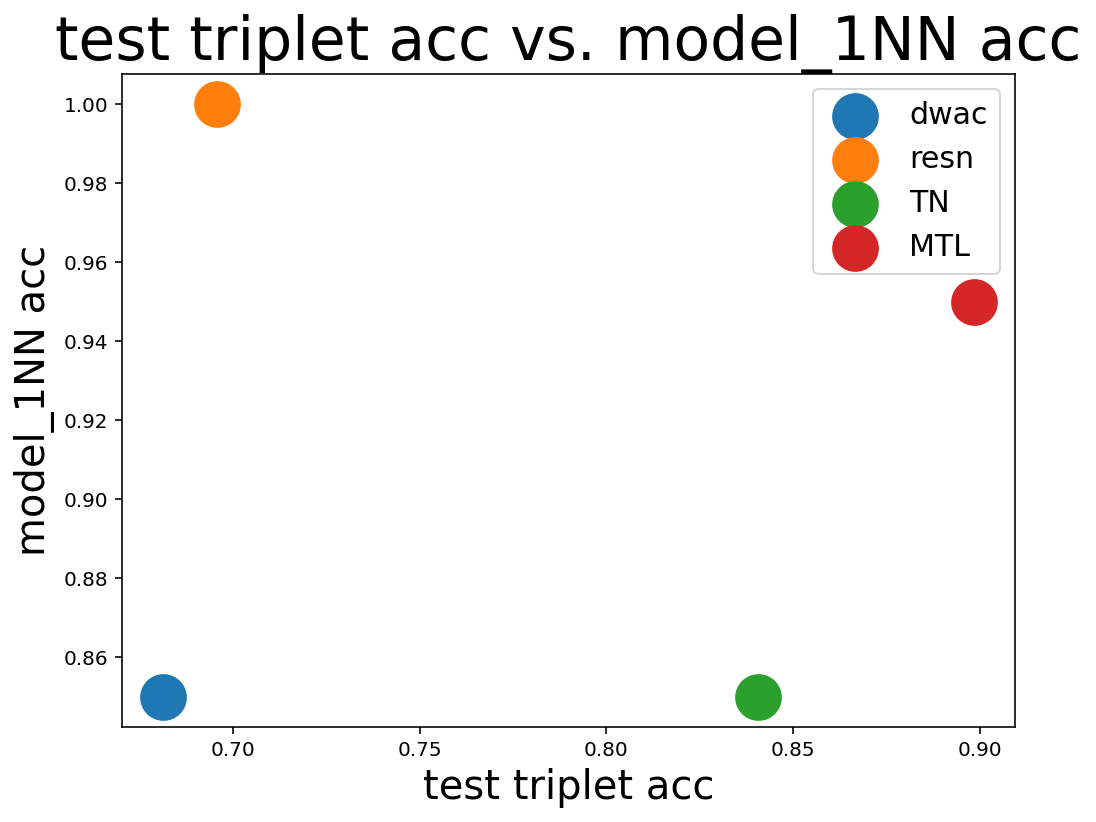

In [8]:
vis_clf_human([dwac, resn, TN,MTL], "knn_acc","valid_triplet_acc", "test triplet acc", "model_1NN acc", ["dwac","resn","TN","MTL"], save=True)

TSNEing


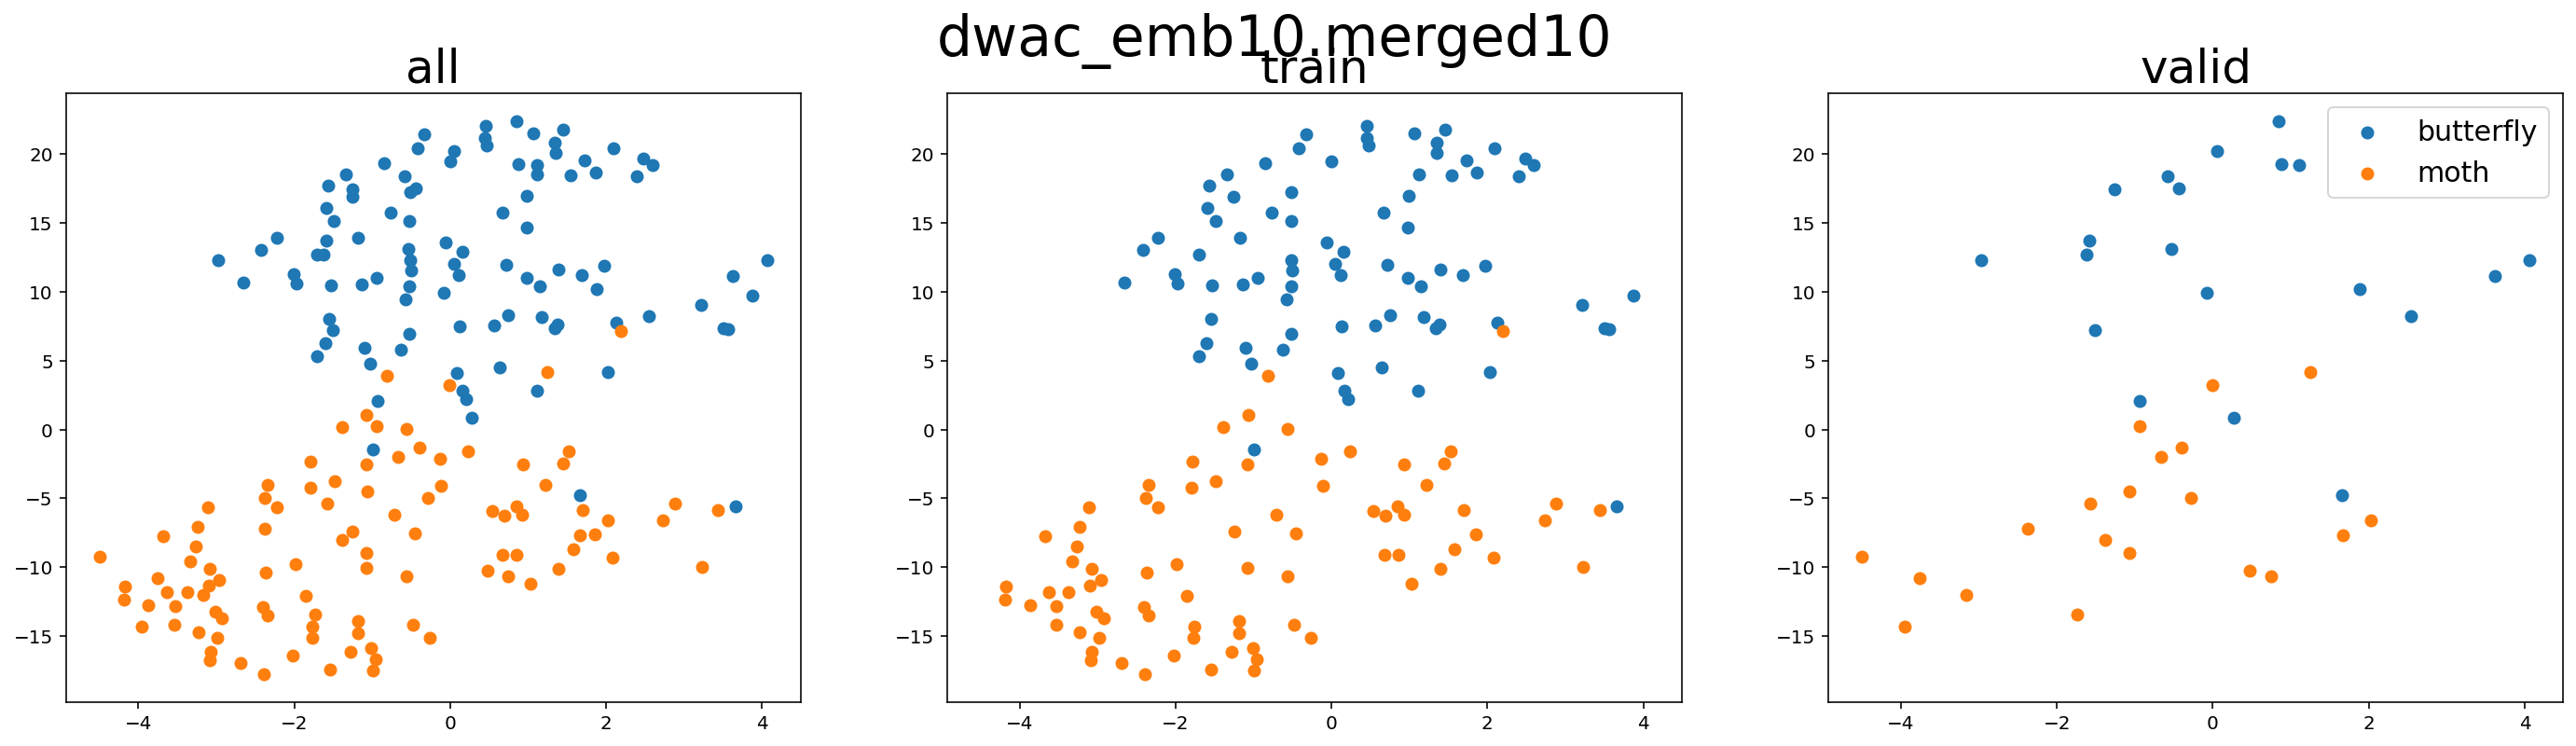

In [9]:
_ = utils.vis_data(dwac_train,y_train,dwac_valid,y_valid, "dwac_emb10.merged10", ["butterfly","moth"], save=True)

TSNEing


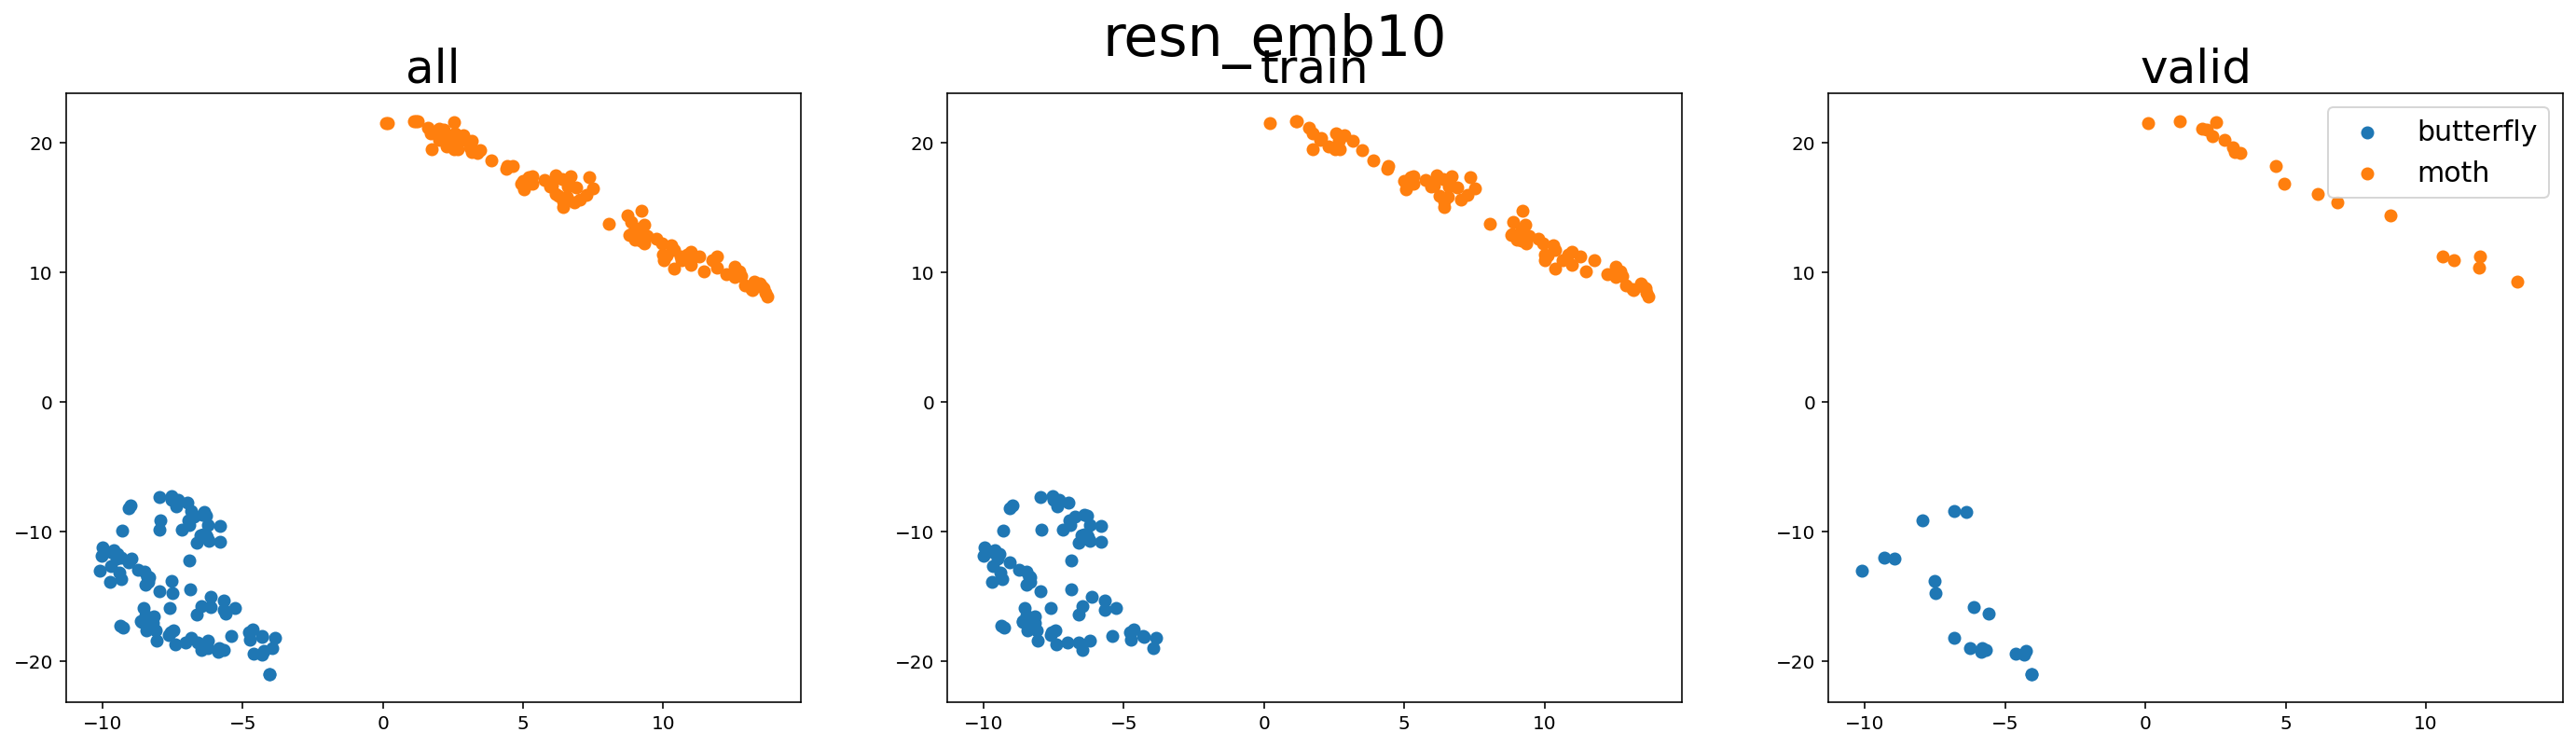

In [10]:
_ = utils.vis_data(resn_train,y_train,resn_valid,y_valid, "resn_emb10", ["butterfly","moth"], save=True)

TSNEing


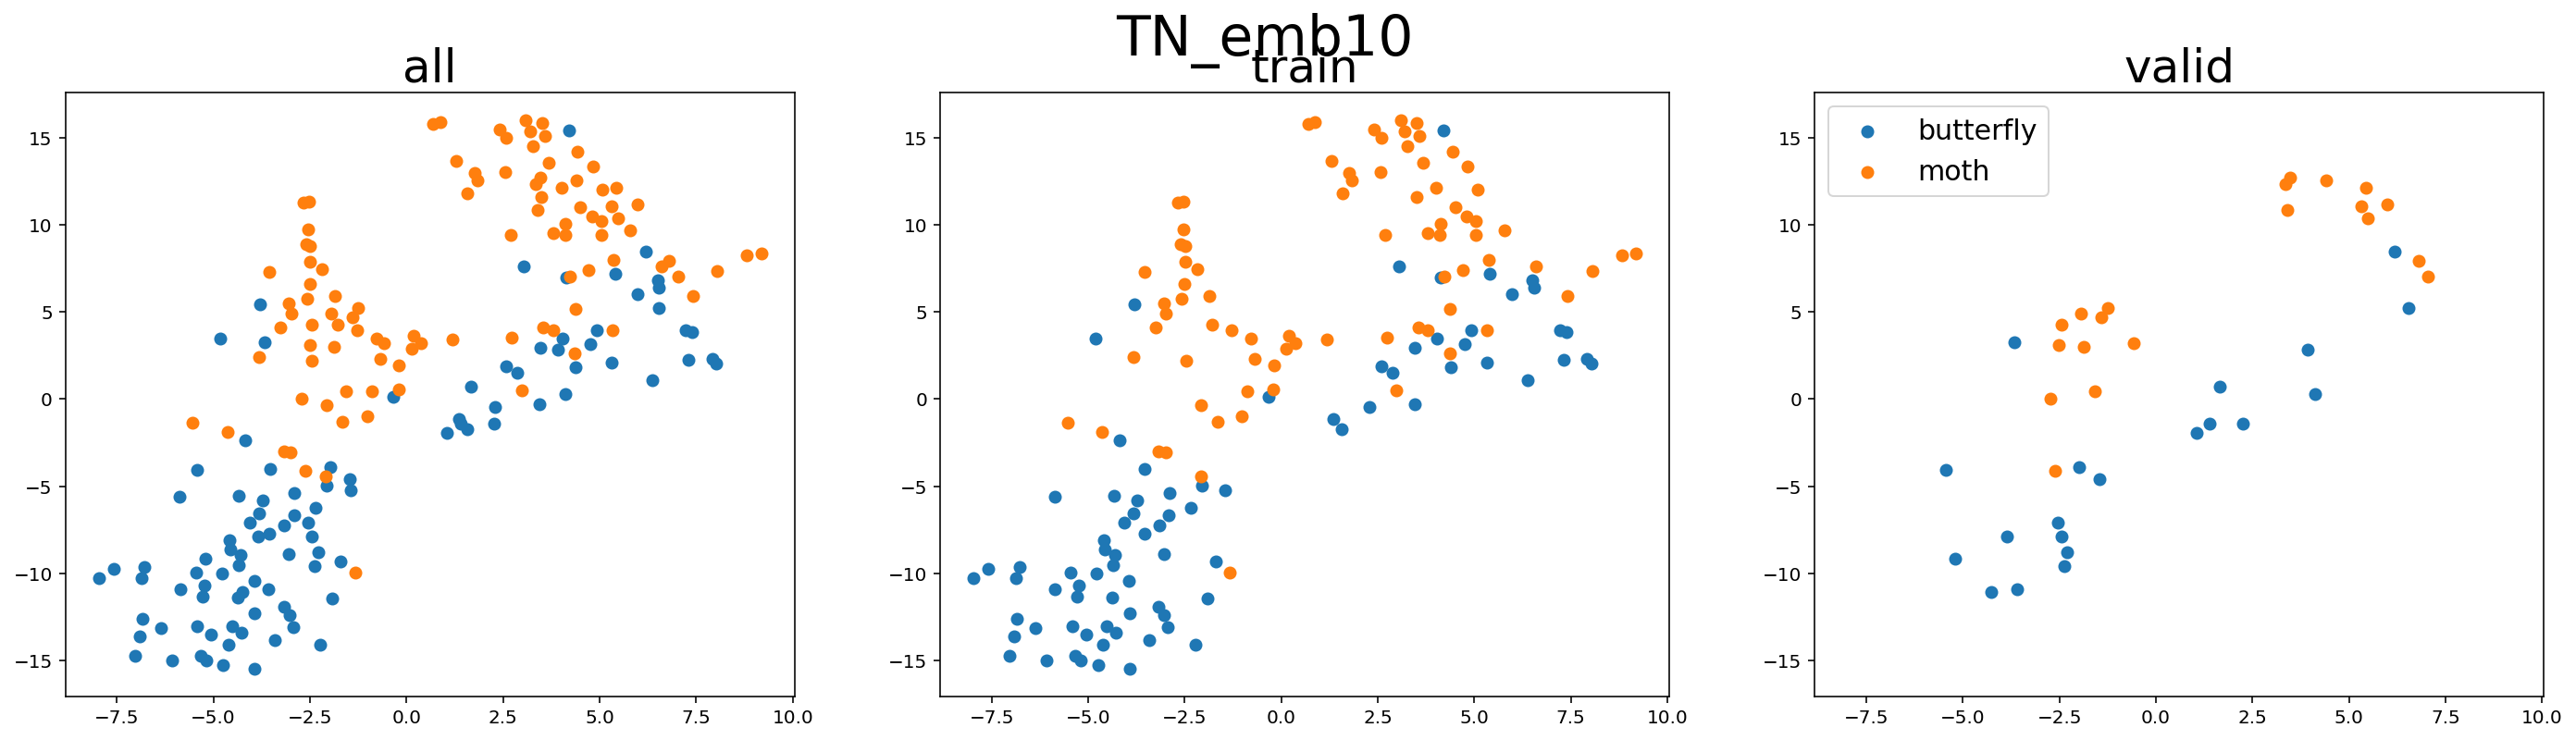

In [11]:
_ = utils.vis_data(TN_train,y_train,TN_valid,y_valid, "TN_emb10", ["butterfly","moth"], save=True)

TSNEing


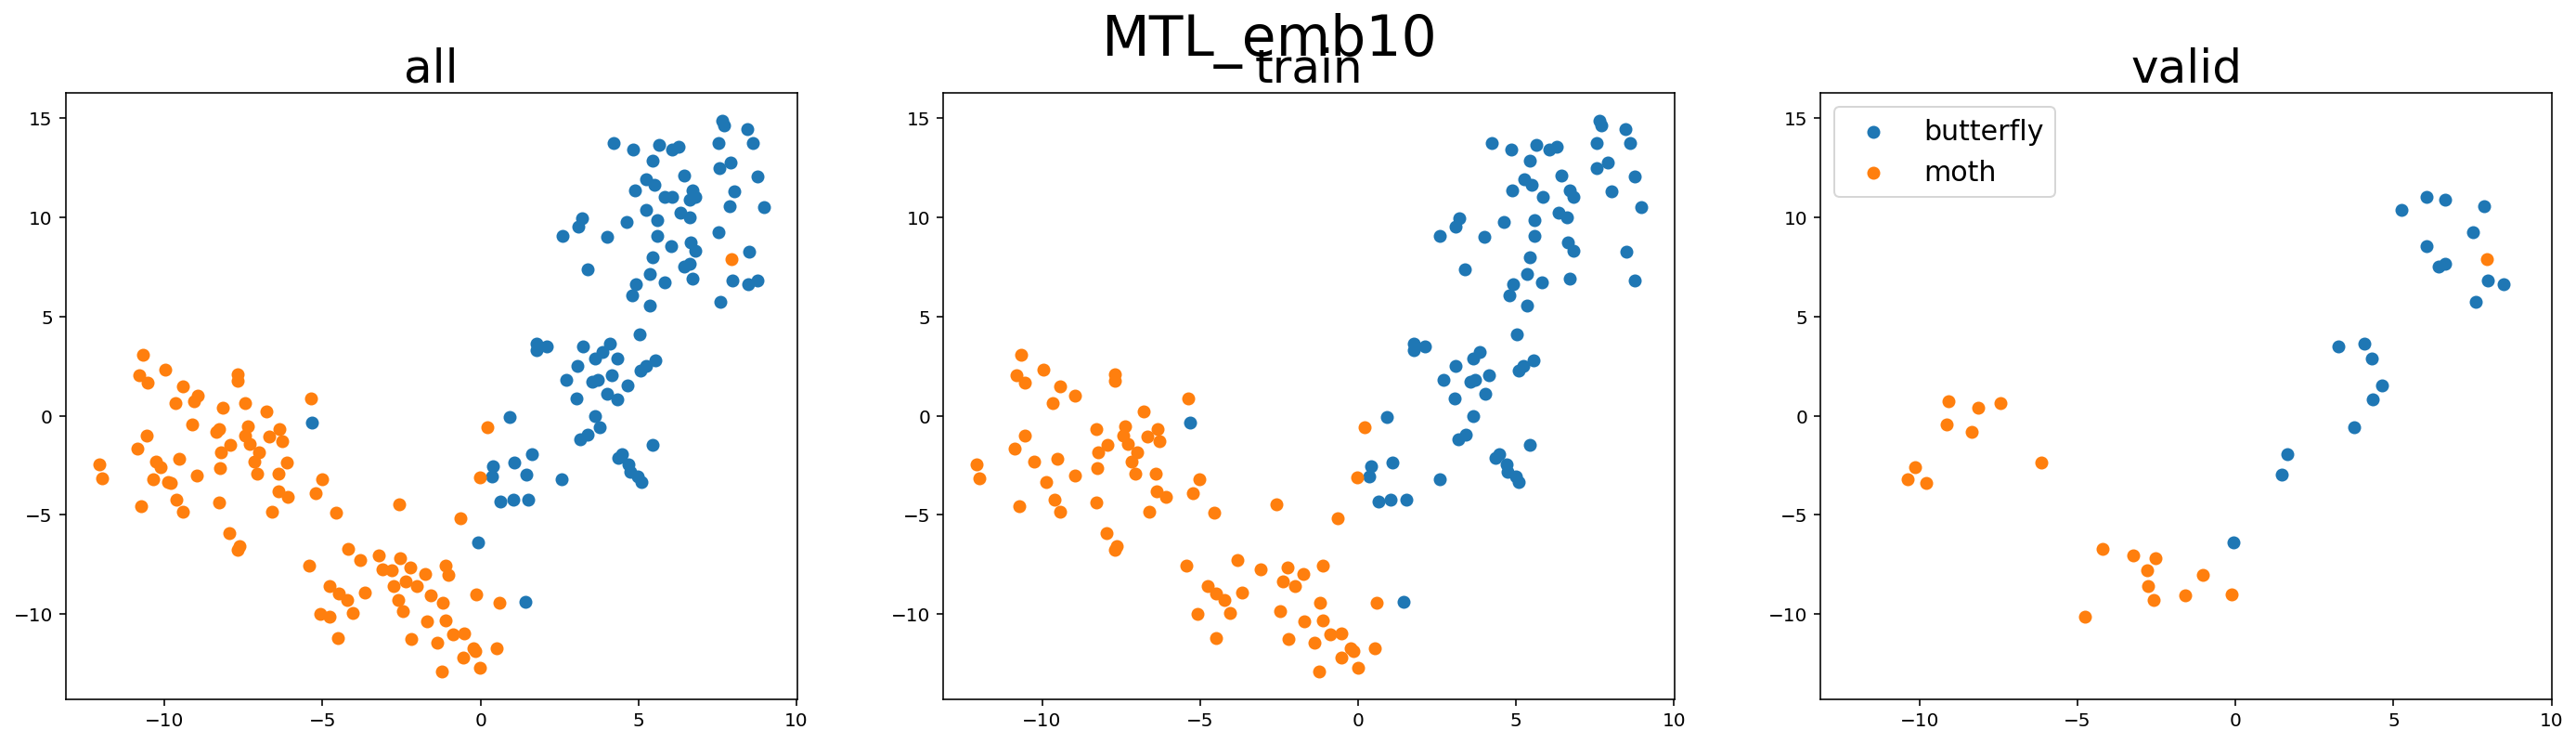

In [12]:
_ = utils.vis_data(MTL_train,y_train,MTL_valid,y_valid, "MTL_emb10", ["butterfly","moth"], save=True)